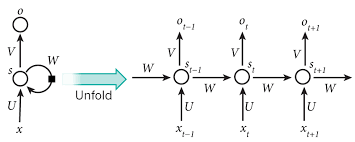

---

## 1. RNN Nedir?

**Recurrent Neural Network (RNN)**, **sıralı verileri (sequential data)** işlemek için tasarlanmış bir yapay sinir ağıdır.

* ANN → bağımsız girdilerle çalışır (ör. tablo verisi).
* CNN → uzaysal verilerle çalışır (ör. resimler).
* **RNN → zamana bağlı / ardışık verilerle çalışır.**

👉 Örnekler:

* Metin: “Bugün hava çok …” → son kelimeyi tahmin etmek için önceki kelimeler önemli.
* Ses: Konuşma tanıma için önceki ses dalgaları gerekir.
* Finans: Hisse senedi fiyatı geçmiş zamana bağlıdır.
* IoT / sensör verisi: Ölçümlerdeki trend önemlidir.

---

## 2. RNN’in Temel Fikri

Klasik ANN’de girişler ve çıktılar birbirinden bağımsızdır.
Ama RNN’de:

* Her nöron sadece girdi almıyor, aynı zamanda **önceki zamandan aldığı “hafızayı” da kullanıyor.**
* Yani **output(t)**, sadece **input(t)**’ye değil, aynı zamanda **hidden state(t-1)**’e bağlıdır.

Formül:

$$
h_t = f(W_x x_t + W_h h_{t-1} + b)
$$

$$
y_t = g(W_y h_t + c)
$$

Burada:

* $x_t$ → o andaki giriş
* $h_t$ → o andaki gizli durum (hidden state = hafıza)
* $h_{t-1}$ → önceki adımın hafızası
* $y_t$ → çıktı

👉 Bu döngüsel bağlantı sayesinde geçmişten bilgi taşınır.

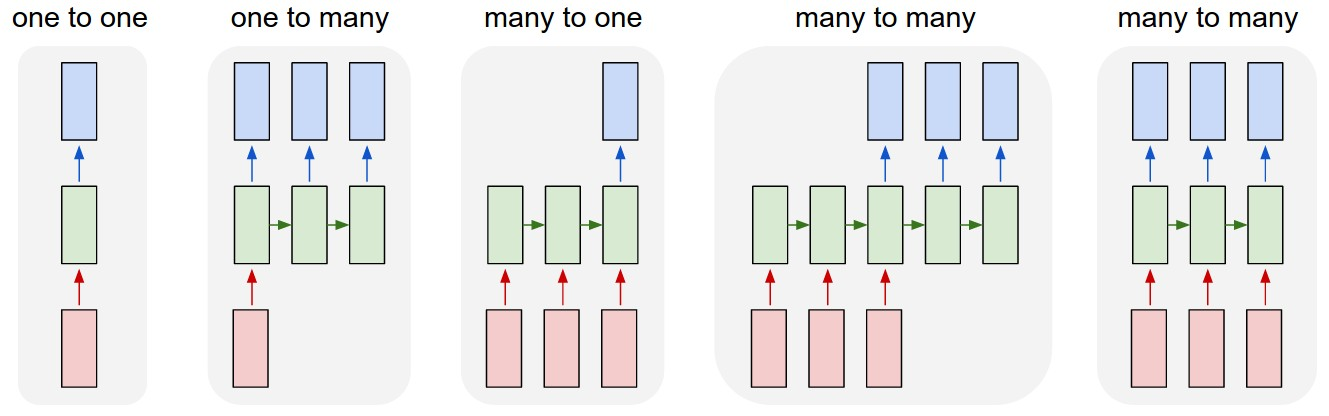

---

## 3. RNN’in Gücü

* **Zaman bağımlılığını yakalar.**
* **Dil modeli:** Kelimeler arasındaki bağı öğrenir.
* **Tahminleme:** Trendleri yakalayabilir (ör. zaman serisi tahmini).
* **Sıra duyarlılığı:** Verilerin sırası önemliyse, RNN doğru çözümdür.

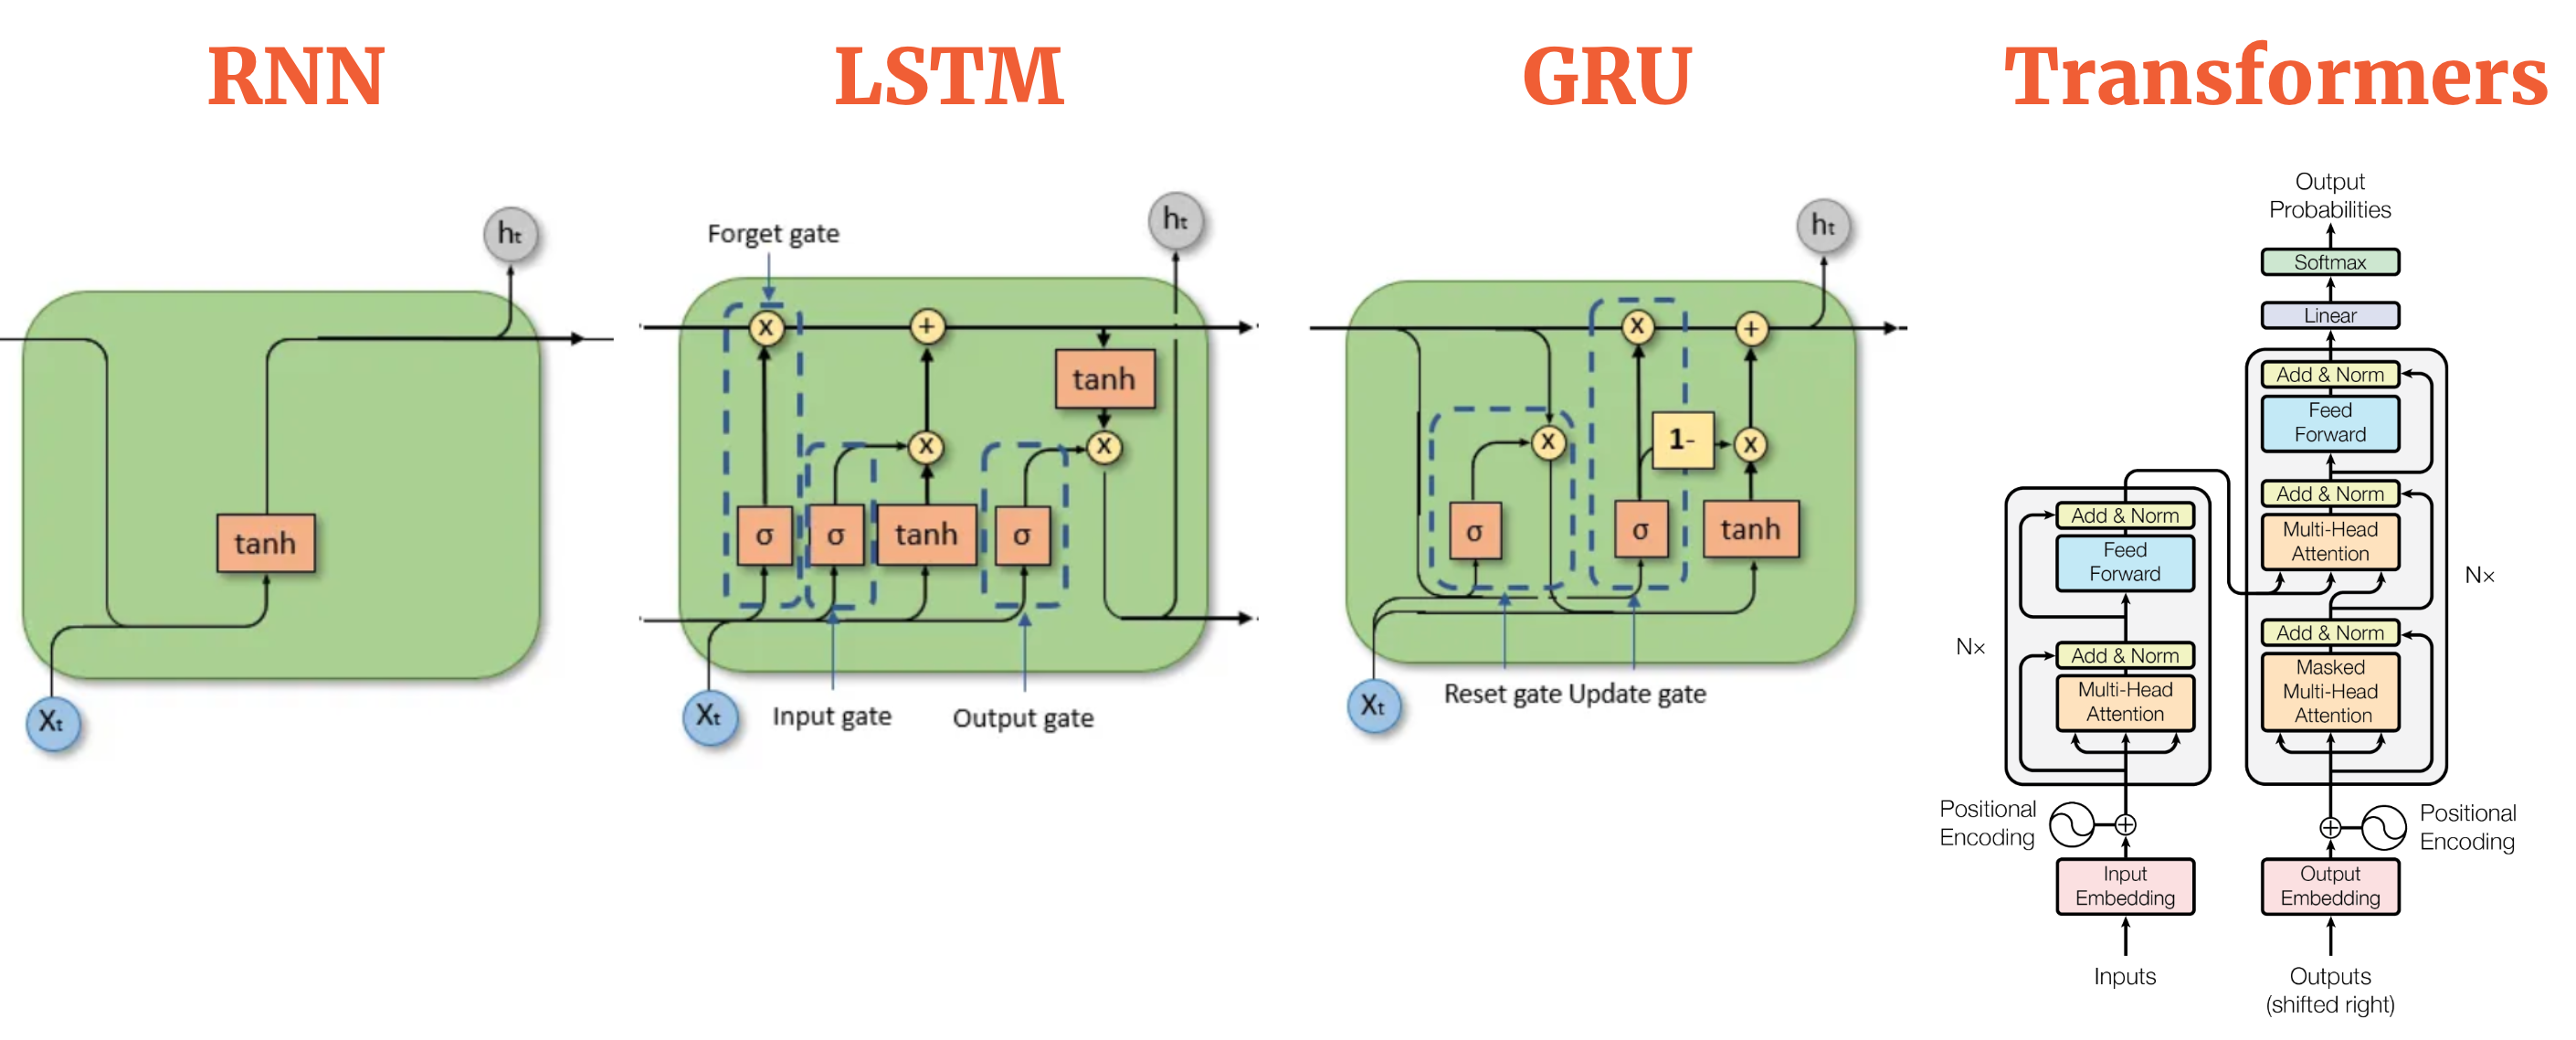

---

## 4. RNN’in Sorunları

* **Vanishing Gradient Problemi:** Zaman içinde geçmişe doğru gidildikçe gradyan kaybolur, uzun bağımlılıkları öğrenemez.
* **Exploding Gradient Problemi:** Tam tersi, gradyan çok büyüyüp sayısal patlama yapabilir.
  👉 Çözüm olarak **LSTM (Long Short-Term Memory)** ve **GRU (Gated Recurrent Unit)** geliştirilmiştir.

---

## 5. Özet (Sezgisel Bakış)

* ANN: Düz hesap makinesi gibi → bağımsız veriler.
* CNN: Göz gibi → resimlerdeki desenleri görür.
* RNN: Kulak + hafıza gibi → geçmişi hatırlar, geleceği tahmin eder.

---

![alt text](1_vnqygSyLIA3QVTe6teca4Q.webp "Title")

---

# 1. Sorun: Vanishing Gradient

* Normal RNN’de uzun sekanslarda (ör. 100 kelimelik cümle) **çok eskideki bilgiyi hatırlamak neredeyse imkânsızdır**.
* Çünkü backpropagation sırasında gradyan değerleri giderek küçülür → öğrenme “unutmaya” başlar.
* Çözüm: “Hafıza hücreleri” ve “kapılar (gates)” eklemek.

---

![alt text](0_NIFLmgpE4TDRBwh4.gif "Title")




# 2. LSTM (Long Short-Term Memory)

📌 LSTM, RNN’in geliştirilmiş versiyonudur. En önemli farkı: **bilgiyi ne zaman tutacağını, ne zaman unutacağını, ne zaman çıktı vereceğini** kontrol eden kapılar eklenmiştir.

### Yapısı

Her LSTM hücresinde 3 ana **kapı (gate)** vardır:

1. **Forget Gate (Unutma Kapısı):**

   * Hangi bilginin atılacağını belirler.
   * Sigmoid fonksiyonu ile 0–1 arası karar verir.
   * Örn: Önemsiz bilgi (eski konu) → 0’a yakın, önemli bilgi → 1’e yakın.

2. **Input Gate (Giriş Kapısı):**

   * Yeni hangi bilginin hafızaya (cell state) ekleneceğini belirler.

3. **Output Gate (Çıkış Kapısı):**

   * O andaki çıktı ne olacak, hafızadan ne kadar yansıtılacak → onu kontrol eder.

### Hücre Durumu (Cell State)

* Bir tür “ana hatırlatma defteri” gibi düşünebilirsin.
* Gradient buradan geçtiği için uzun bağımlılıkları koruyabilir.

👉 Sonuç: LSTM, **uzun süreli bağımlılıkları öğrenebilir.**
Örn: “Benim adım Ahmet. … Onun mesleği mühendis.” → “Onun” zamiri için çok önceden geçen “Ahmet” bilgisi tutulabilir.

---

![alt text](5w37uXz.gif "Title")

# 3. GRU (Gated Recurrent Unit)

📌 GRU, LSTM’in daha basit ve hızlı versiyonudur.

* Daha az kapı vardır ama mantık benzerdir.

### Yapısı

1. **Update Gate:**

   * Hem forget hem input görevini birlikte yapar.
   * “Geçmişten neyi tutayım, şimdiden neyi ekleyeyim?” sorusunu tek adımda çözer.

2. **Reset Gate:**

   * Geçmiş bilginin ne kadarını sıfırlayacağını belirler.

👉 GRU’da cell state yok, sadece hidden state var. Bu sayede **daha az parametre** → **daha hızlı eğitim**.

---

# 4. LSTM vs GRU

| Özellik      | LSTM                                     | GRU                                |
| ------------ | ---------------------------------------- | ---------------------------------- |
| Kapı sayısı  | 3 (forget, input, output)                | 2 (update, reset)                  |
| Hücre durumu | Var (cell state + hidden state)          | Yok (sadece hidden state)          |
| Karmaşıklık  | Daha karmaşık (daha çok parametre)       | Daha basit                         |
| Hız          | Daha yavaş                               | Daha hızlı                         |
| Performans   | Uzun bağımlılıkları daha iyi öğrenebilir | Daha az karmaşık verilerde yeterli |
| Kullanım     | NLP, konuşma tanıma, karmaşık sekanslar  | Daha hızlı eğitim isteyen projeler |

---

# 5. Özet (Sezgisel Benzetme)

* **RNN:** Kısa süreli hafızası olan biri (son 2–3 kelimeyi hatırlar).
* **LSTM:** Ajandası olan biri → önemli şeyleri not alıyor, unutulacakları siliyor.
* **GRU:** Ajanda kullanmıyor ama çok pratik → önemli şeyleri aklında tutuyor, önemsizleri hızlıca atıyor.

---

📌 Gerçek dünyada:

* **LSTM**: Uzun sekanslı işler → dil modeli, makine çevirisi, müzik üretimi.
* **GRU**: Daha hızlı prototipler → gerçek zamanlı uygulamalar, basit dil modelleri, küçük veri setleri.

---

İstersen ben sana **LSTM hücresinin şematik görselini** ve kapıların nasıl çalıştığını da çizebilirim. Gösterelim mi?

---

## 📌 LSTM Kullanılabilen Veri Türleri

### 1. **Doğal Dil (Text / NLP)**

* Cümleler, paragraflar, konuşma metinleri ardışık veri olduğundan LSTM çok uygundur.
* Örnekler:

  * Metin tamamlama (“Bugün hava çok …”)
  * Dil modeli (GPT’nin erken versiyonları da LSTM temelliydi)
  * Makine çevirisi (İngilizce → Türkçe)
  * Duygu analizi (yorumların pozitif/negatif olduğunu tahmin etme)

---

### 2. **Ses Verisi**

* Ses dalgaları zaman serisidir.
* Örnekler:

  * Konuşma tanıma (Google Voice, Siri, Alexa)
  * Müzik türü sınıflandırma
  * Sesle duygu analizi

---

### 3. **Zaman Serileri (Time Series Data)**

* Finans, IoT, sağlık verileri gibi alanlarda çok kullanılır.
* Örnekler:

  * Hisse senedi fiyatı tahmini (geçmiş fiyatlara bakarak geleceği öngörme)
  * IoT sensör verileri (makine arızasını tahmin etme)
  * Hava durumu tahmini (geçmiş sıcaklık/yağış verilerine dayalı)

---

### 4. **Video / Görüntü Sekansları**

* Video = çok sayıda resim (frame) + zaman bağımlılığı.
* CNN karelerdeki görsel özellikleri çıkarır → LSTM zaman içindeki hareketi öğrenir.
* Örnekler:

  * Hareket tanıma (yürümek, koşmak, zıplamak)
  * Video özetleme
  * Olay tahmini

---

### 5. **Sağlık Verileri**

* Hastaların zaman içindeki ölçümleri (nabız, kan şekeri, EEG, EKG).
* Örnekler:

  * Kalp ritmi anomalisi tespiti
  * Beyin dalgası analizi
  * Hastalık progresyonu tahmini

---

## 🎯 Özet

LSTM şu tür verilerde **çok etkilidir**:

* **Sequential Data (Sıralı Veriler)**
* **Time Series (Zaman Serileri)**
* **Bağımlılık uzun vadeye yayılıyorsa** (ör. 100 kelimelik cümledeki ilk kelime son kelimeyi etkiliyorsa).

👉 Yani “bağımsız gözlemler” için değil, **geçmişin geleceği etkilediği durumlar** için kullanılır.

---

